In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [12]:
# Define the directory paths for EC-1 and EC-2 datasets
ec1_dir = "./data_sets/EC-1/"
ec2_dir = "./data_sets/EC-2/"

# Check if the directories exist
if not os.path.exists(ec1_dir):
    print(f"Directory {ec1_dir} does not exist.")
if not os.path.exists(ec2_dir):
    print(f"Directory {ec2_dir} does not exist.")


In [13]:
# Load EC-1 datasets into a dictionary
ec1_files = [f for f in os.listdir(ec1_dir) if f.endswith('.csv')]
ec1_data = {file.split(".")[0]: pd.read_csv(os.path.join(ec1_dir, file)) for file in ec1_files}

# Load EC-2 datasets into a dictionary
ec2_files = [f for f in os.listdir(ec2_dir) if f.endswith('.csv')]
ec2_data = {file.split(".")[0]: pd.read_csv(os.path.join(ec2_dir, file)) for file in ec2_files}

# Display the loaded dataset names
print("EC-1 Datasets Loaded:", ec1_data.keys())
print("EC-2 Datasets Loaded:", ec2_data.keys())


C:\Users\kavin\AppData\Local\Temp\ipykernel_2072\2690395788.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ec1_data = {file.split(".")[0]: pd.read_csv(os.path.join(ec1_dir, file)) for file in ec1_files}


EC-1 Datasets Loaded: dict_keys(['w1_ac_roster', 'w1_appliances', 'w1_demographics', 'w1_electricity_generation_water_heating_cooking', 'w1_fan_roster', 'w1_household_information_and_history', 'w1_light_roster', 'w1_room_roster'])
EC-2 Datasets Loaded: dict_keys(['non_smart_meter_data', 'smart_meter_data'])


In [14]:
# Function to display basic information of each dataset
def dataset_summary(data_dict):
    for name, data in data_dict.items():
        print(f"Dataset: {name}")
        print("Shape:", data.shape)
        print("Missing Values:\n", data.isnull().sum())
        print("-" * 50)

# Summary of EC-1 and EC-2 datasets
print("EC-1 Dataset Summary")
dataset_summary(ec1_data)

print("EC-2 Dataset Summary")
dataset_summary(ec2_data)


EC-1 Dataset Summary
Dataset: w1_ac_roster
Shape: (1171, 10)
Missing Values:
 household_ID                                        0
room_ID                                             0
ac_ID                                               0
type_of_the_ac                                      0
is_the_ac_inverter_or_not                           0
is_room_fully_sealed                                0
wattage_of_the_ac                                 356
btu_of_the_ac                                     553
no_of_hours_ac_was_on_during_daytime_last_week      0
no_of_hours_ac_was_on_during_night_last_week        0
dtype: int64
--------------------------------------------------
Dataset: w1_appliances
Shape: (53599, 4)
Missing Values:
 household_ID                             0
appliance_ID                             0
appliance_type                           0
no_of_hours_used_during_last_week    21780
dtype: int64
--------------------------------------------------
Dataset: w1_demographics

In [15]:
# Fill missing values dynamically for all datasets
def fill_missing_values(data_dict):
    for name, data in data_dict.items():
        data_dict[name] = data.fillna({
            col: data[col].median() if data[col].dtype != 'object' else "Unknown"
            for col in data.columns
        })

# Fill missing values for both EC-1 and EC-2 datasets
fill_missing_values(ec1_data)
fill_missing_values(ec2_data)


In [16]:
# Check column names in each dataset
print("Demographics Columns:", demographics.columns)
print("Household Info Columns:", household_info.columns)
print("Appliances Columns:", appliances.columns)


Demographics Columns: Index(['household_ID', 'member_ID', 'age',
       'relationship_to_the_head_of_household', 'gender', 'ethnicity',
       'religion', 'marital_status',
       'current_attendance_in_any_education_instituition',
       'highest_level_of_education', 'main_activity_engaged_in',
       'main_occupation', 'daily_wage_owner_or_not',
       'employment_status_of_the_main_occupation',
       'no_of_hours_stayed_at_home_during_last_week',
       'member_went_out_for_work_or_not_during_last_week'],
      dtype='object')
Household Info Columns: Index(['household_ID', 'no_of_electricity_meters',
       'electricity_provider_csc_area', 'own_the_house_or_living_on_rent',
       'occupy_renters_boarders',
       'awareness_of_electricity_consumption_of_renters',
       'built_year_of_the_house', 'type_of_house', 'floor_which_house_located',
       'no_of_storeys', 'floor_area', 'no_of_household_members',
       'charging_method_of_renters_for_electricity',
       'charged_method_

In [17]:
# Clean column names by stripping spaces and converting to lowercase
demographics.columns = demographics.columns.str.strip().str.lower()
household_info.columns = household_info.columns.str.strip().str.lower()
appliances.columns = appliances.columns.str.strip().str.lower()

# Check the cleaned column names
print("Demographics Columns after Cleaning:", demographics.columns)
print("Household Info Columns after Cleaning:", household_info.columns)
print("Appliances Columns after Cleaning:", appliances.columns)


Demographics Columns after Cleaning: Index(['household_id', 'member_id', 'age',
       'relationship_to_the_head_of_household', 'gender', 'ethnicity',
       'religion', 'marital_status',
       'current_attendance_in_any_education_instituition',
       'highest_level_of_education', 'main_activity_engaged_in',
       'main_occupation', 'daily_wage_owner_or_not',
       'employment_status_of_the_main_occupation',
       'no_of_hours_stayed_at_home_during_last_week',
       'member_went_out_for_work_or_not_during_last_week'],
      dtype='object')
Household Info Columns after Cleaning: Index(['household_id', 'no_of_electricity_meters',
       'electricity_provider_csc_area', 'own_the_house_or_living_on_rent',
       'occupy_renters_boarders',
       'awareness_of_electricity_consumption_of_renters',
       'built_year_of_the_house', 'type_of_house', 'floor_which_house_located',
       'no_of_storeys', 'floor_area', 'no_of_household_members',
       'charging_method_of_renters_for_electri

In [18]:
# Check if 'household_id' exists in each dataset
print("Household_ID in Demographics:", 'household_id' in demographics.columns)
print("Household_ID in Household Info:", 'household_id' in household_info.columns)
print("Household_ID in Appliances:", 'household_id' in appliances.columns)


Household_ID in Demographics: True
Household_ID in Household Info: True
Household_ID in Appliances: True


In [19]:
# Merge datasets on 'Household_ID' after verifying it exists
combined_ec1 = pd.merge(demographics, household_info, on="household_id", how="inner")
combined_ec1 = pd.merge(combined_ec1, appliances, on="household_id", how="inner")

# Display the merged dataset
print("Combined EC-1 Data")
print(combined_ec1.head())

Combined EC-1 Data
  household_id member_id  age relationship_to_the_head_of_household gender  \
0       ID0001        I1   71                 Head of the household   Male   
1       ID0001        I1   71                 Head of the household   Male   
2       ID0001        I1   71                 Head of the household   Male   
3       ID0001        I1   71                 Head of the household   Male   
4       ID0001        I1   71                 Head of the household   Male   

  ethnicity  religion                  marital_status  \
0   Sinhala  Buddhism  Currently married (registered)   
1   Sinhala  Buddhism  Currently married (registered)   
2   Sinhala  Buddhism  Currently married (registered)   
3   Sinhala  Buddhism  Currently married (registered)   
4   Sinhala  Buddhism  Currently married (registered)   

  current_attendance_in_any_education_instituition  \
0                                  Does not attend   
1                                  Does not attend   
2      

In [20]:
# Check the shape of the merged data
print(f"Combined EC-1 Data Shape: {combined_ec1.shape}")

# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(combined_ec1.describe())

# Display information about data types and missing values
print("\nData Information:")
combined_ec1.info()

# Check for missing values in the combined data
print("\nMissing Values in Combined Data:")
print(combined_ec1.isnull().sum())


Combined EC-1 Data Shape: (223757, 44)
Summary Statistics for Numerical Columns:
                 age  no_of_hours_stayed_at_home_during_last_week  \
count  223757.000000                                223757.000000   
mean       38.709560                                   124.953547   
std        21.951279                                    47.403854   
min         0.000000                                     0.000000   
25%        20.000000                                    96.000000   
50%        38.000000                                   140.000000   
75%        56.000000                                   168.000000   
max        98.000000                                   168.000000   

       no_of_electricity_meters  floor_which_house_located  no_of_storeys  \
count             223757.000000              223757.000000  223757.000000   
mean                   1.084216                   2.014055       1.071837   
std                    0.318926                   0.383992       0

In [21]:
# Fill missing numerical values with the median (for example, 'floor_area' column)
combined_ec1['floor_area'].fillna(combined_ec1['floor_area'].median(), inplace=True)

# For categorical columns, fill with the mode (for example, 'type_of_house')
combined_ec1['type_of_house'].fillna(combined_ec1['type_of_house'].mode()[0], inplace=True)

# Check again for missing values after filling
print("\nMissing Values After Filling:")
print(combined_ec1.isnull().sum())


C:\Users\kavin\AppData\Local\Temp\ipykernel_2072\89527898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_ec1['floor_area'].fillna(combined_ec1['floor_area'].median(), inplace=True)
C:\Users\kavin\AppData\Local\Temp\ipykernel_2072\89527898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa


Missing Values After Filling:
household_id                                           0
member_id                                              0
age                                                    0
relationship_to_the_head_of_household                  0
gender                                                 0
ethnicity                                              0
religion                                               0
marital_status                                         0
current_attendance_in_any_education_instituition       0
highest_level_of_education                             0
main_activity_engaged_in                               0
main_occupation                                        0
daily_wage_owner_or_not                                0
employment_status_of_the_main_occupation               0
no_of_hours_stayed_at_home_during_last_week            0
member_went_out_for_work_or_not_during_last_week       0
no_of_electricity_meters                               0


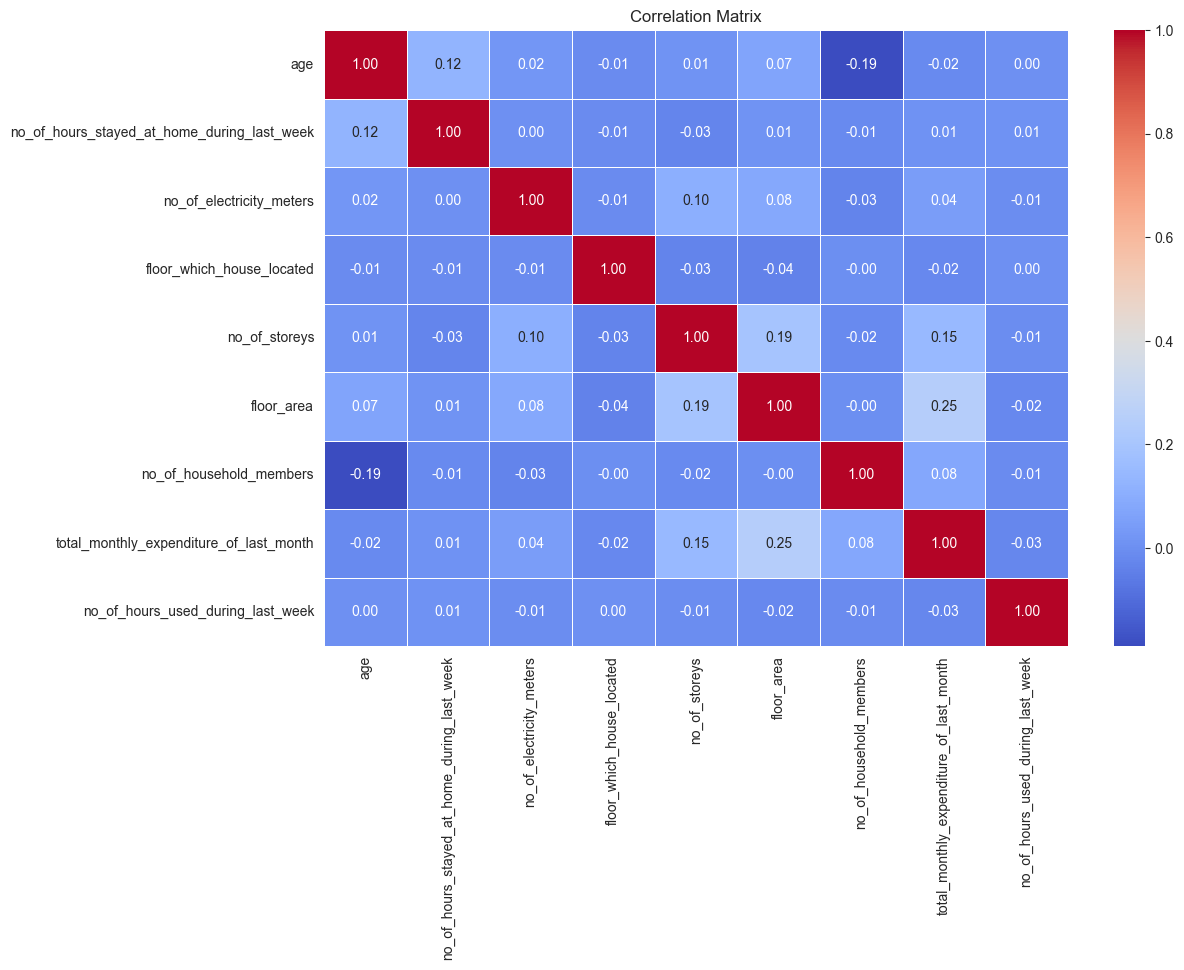

In [23]:
# Select only numeric columns for correlation matrix calculation
numeric_columns = combined_ec1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix provides a measure of the linear relationship between pairs of variables in the dataset. Each cell in the matrix shows the correlation coefficient between two variables. The value of the correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

Here's a brief explanation of the correlation matrix:

```markdown
| Variable                                      | age   | no_of_hours_stayed_at_home_during_last_week | no_of_electricity_meters | floor_which_house_located | no_of_storeys | floor_area | no_of_household_members | total_monthly_expenditure_of_last_month | no_of_hours_used_during_last_week |
|-----------------------------------------------|-------|---------------------------------------------|--------------------------|---------------------------|---------------|------------|-------------------------|-----------------------------------------|----------------------------------|
| age                                           | 1.000 | 0.122                                       | 0.021                    | -0.010                    | 0.015         | 0.068      | -0.190                  | -0.017                                  | 0.001                            |
| no_of_hours_stayed_at_home_during_last_week   | 0.122 | 1.000                                       | 0.003                    | -0.008                    | -0.030        | 0.014      | -0.015                  | 0.007                                   | 0.008                            |
| no_of_electricity_meters                      | 0.021 | 0.003                                       | 1.000                    | -0.010                    | 0.104         | 0.085      | -0.033                  | 0.045                                   | -0.005                           |
| floor_which_house_located                     | -0.010| -0.008                                      | -0.010                   | 1.000                     | -0.032        | -0.038     | -0.002                  | -0.020                                  | 0.002                            |
| no_of_storeys                                 | 0.015 | -0.030                                      | 0.104                    | -0.032                    | 1.000         | 0.192      | -0.016                  | 0.148                                   | -0.006                           |
| floor_area                                    | 0.068 | 0.014                                       | 0.085                    | -0.038                    | 0.192         | 1.000      | -0.001                  | 0.246                                   | -0.022                           |
| no_of_household_members                       | -0.190| -0.015                                      | -0.033                   | -0.002                    | -0.016        | -0.001     | 1.000                   | 0.076                                   | -0.011                           |
| total_monthly_expenditure_of_last_month       | -0.017| 0.007                                       | 0.045                    | -0.020                    | 0.148         | 0.246      | 0.076                   | 1.000                                   | -0.025                           |
| no_of_hours_used_during_last_week             | 0.001 | 0.008                                       | -0.005                   | 0.002                     | -0.006        | -0.022     | -0.011                  | -0.025                                  | 1.000                            |
```

### Key Observations:
1. **Age and Household Members**: There is a moderate negative correlation (-0.190) between age and the number of household members, indicating that older individuals tend to have fewer household members.
2. **Floor Area and Monthly Expenditure**: There is a moderate positive correlation (0.246) between floor area and total monthly expenditure, suggesting that larger houses tend to have higher monthly expenditures.
3. **Number of Storeys and Floor Area**: There is a strong positive correlation (0.192) between the number of storeys and floor area, indicating that houses with more storeys tend to have larger floor areas.
4. **No Significant Correlation**: Some variables, such as the number of hours used during the last week and other variables, show very low or no significant correlation, indicating no strong linear relationship.

These observations can help in understanding the relationships between different variables and can be useful for further analysis or modeling.

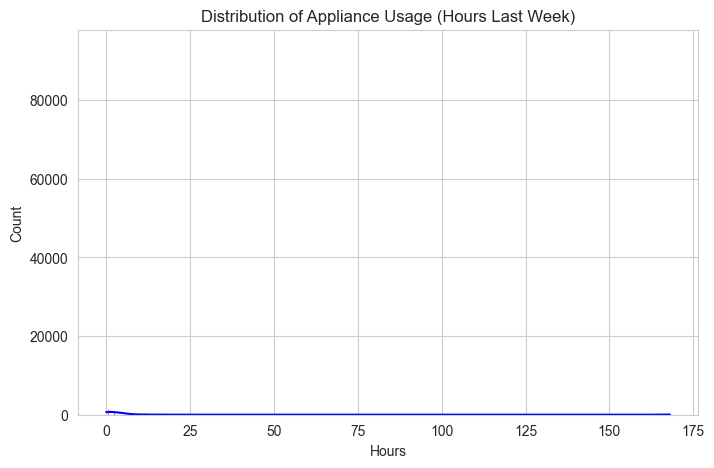

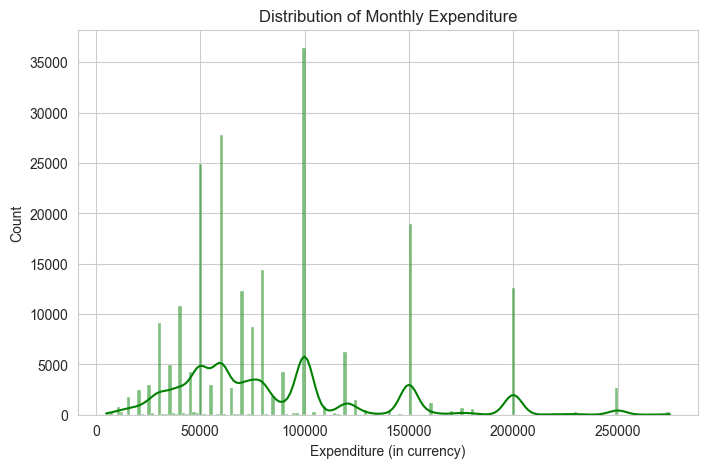

In [24]:
# Distribution of hours used for appliances
plt.figure(figsize=(8, 5))
sns.histplot(combined_ec1['no_of_hours_used_during_last_week'], kde=True, color='blue')
plt.title('Distribution of Appliance Usage (Hours Last Week)')
plt.xlabel('Hours')
plt.show()

# Distribution of monthly expenditure
plt.figure(figsize=(8, 5))
sns.histplot(combined_ec1['total_monthly_expenditure_of_last_month'], kde=True, color='green')
plt.title('Distribution of Monthly Expenditure')
plt.xlabel('Expenditure (in currency)')
plt.show()


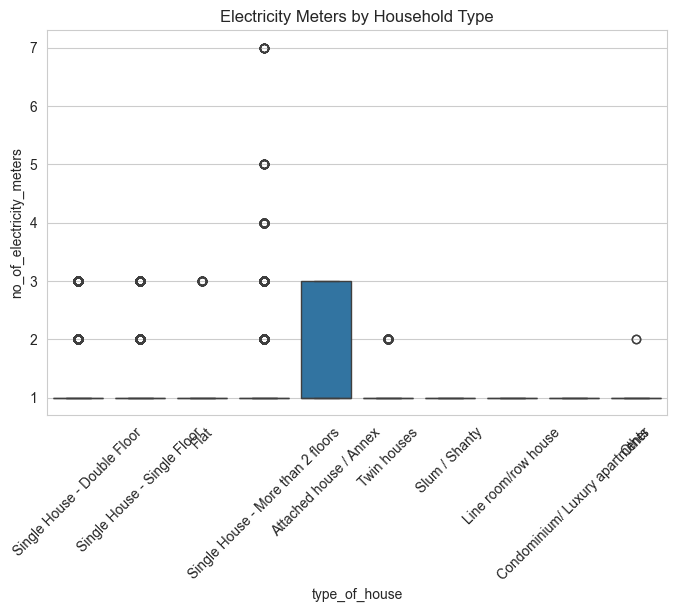

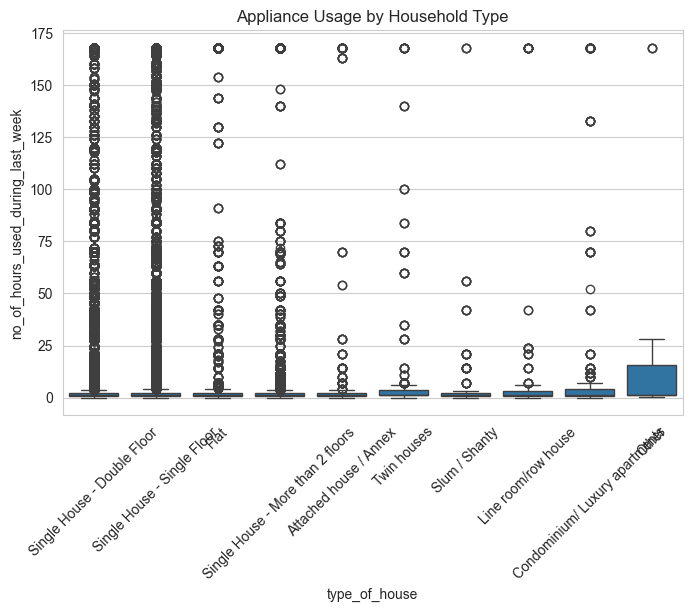

In [25]:
# Average electricity usage by household type
plt.figure(figsize=(8, 5))
sns.boxplot(x='type_of_house', y='no_of_electricity_meters', data=combined_ec1)
plt.title('Electricity Meters by Household Type')
plt.xticks(rotation=45)
plt.show()

# Average appliance usage by household type
plt.figure(figsize=(8, 5))
sns.boxplot(x='type_of_house', y='no_of_hours_used_during_last_week', data=combined_ec1)
plt.title('Appliance Usage by Household Type')
plt.xticks(rotation=45)
plt.show()


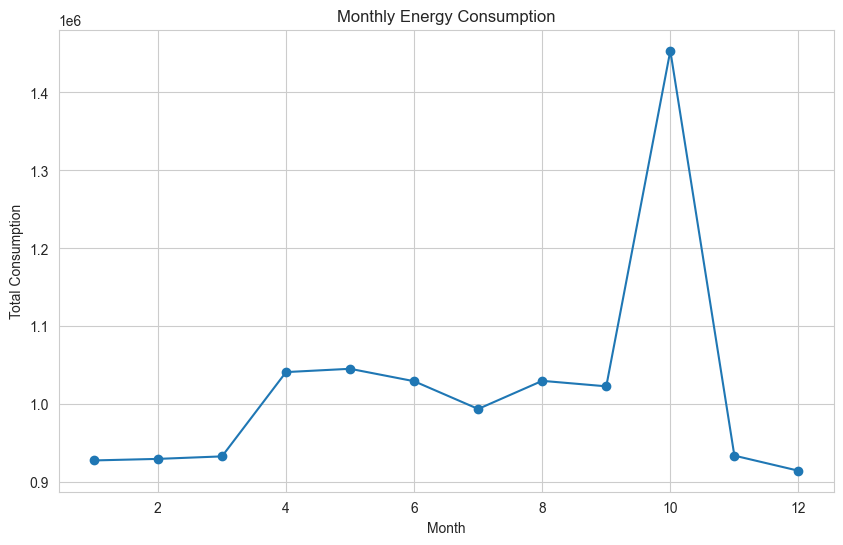

In [28]:
# Load EC-2 data (non-smart and smart meter data)
non_smart_meter_data = pd.read_csv(os.path.join(ec2_dir, 'non_smart_meter_data.csv'))
smart_meter_data = pd.read_csv(os.path.join(ec2_dir, 'smart_meter_data.csv'))

# Combine EC-2 datasets
combined_ec2 = pd.concat([non_smart_meter_data, smart_meter_data])

# Ensure 'consumption' column is numeric
combined_ec2['consumption'] = pd.to_numeric(combined_ec2['consumption'], errors='coerce')

# Analyze time-based energy consumption trends
combined_ec2['month'] = pd.to_datetime(combined_ec2['month'])

# Group by month and calculate total consumption
monthly_consumption = combined_ec2.groupby(combined_ec2['month'].dt.month)['consumption'].sum()

# Plot the time-based consumption trends
plt.figure(figsize=(10, 6))
monthly_consumption.plot(kind='line', marker='o')
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Consumption')
plt.grid(True)
plt.show()


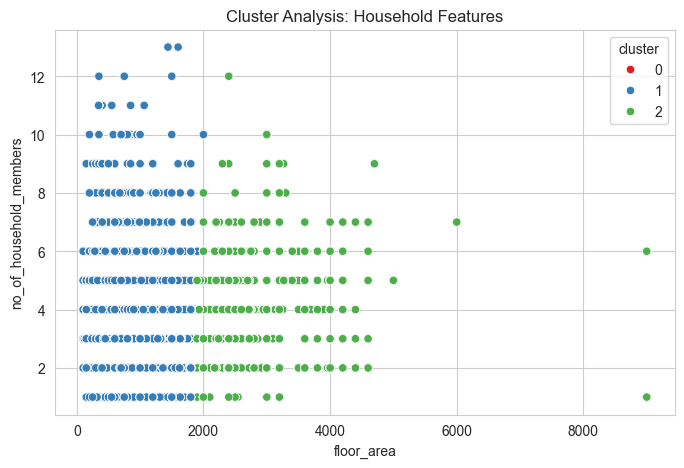

In [31]:


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = combined_ec1[['floor_area', 'no_of_household_members', 'no_of_hours_used_during_last_week']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_ec1['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='floor_area', y='no_of_household_members', hue='cluster', data=combined_ec1, palette='Set1')
plt.title('Cluster Analysis: Household Features')
plt.show()


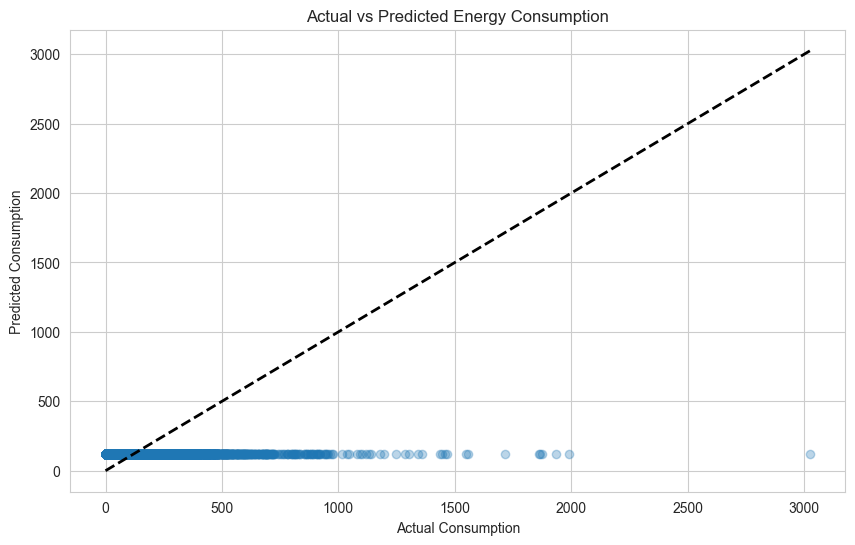

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

# Select relevant features for prediction
features = combined_ec2[['TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)', 'PHASE_A_CURRENT (A)', 'PHASE_A_VOLTAGE (V)', 'FREQUENCY (Hz)']]
target = combined_ec2['consumption']

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate a sample dataset (500 data points) for predictions
sample_data = combined_ec2.sample(n=500, random_state=42)

# Select relevant features for prediction
sample_features = sample_data[['TOTAL_IMPORT (kWh)', 'TOTAL_EXPORT (kWh)', 'PHASE_A_CURRENT (A)', 'PHASE_A_VOLTAGE (V)', 'FREQUENCY (Hz)']]
sample_target = sample_data['consumption']

# Handle missing values by imputing with the mean
sample_features_imputed = imputer.transform(sample_features)

# Make predictions on the sample data
sample_predictions = model.predict(sample_features_imputed)

# Calculate evaluation metrics
mae = mean_absolute_error(sample_target, sample_predictions)
mse = mean_squared_error(sample_target, sample_predictions)
r2 = r2_score(sample_target, sample_predictions)

# Display sample predictions and evaluation metrics
sample_results = pd.DataFrame({
    'Actual Consumption': sample_target,
    'Predicted Consumption': sample_predictions
})

print(sample_results.head())
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

       Actual Consumption  Predicted Consumption
99386          121.434171             121.531437
59424          208.000000             121.531385
79572          121.434171             121.531539
16560          121.434171             121.531426
45179          121.434171             121.530890

Mean Absolute Error (MAE): 26.289346842323532
Mean Squared Error (MSE): 3735.60640540717
R-squared (R²): -8.143058746434839e-05


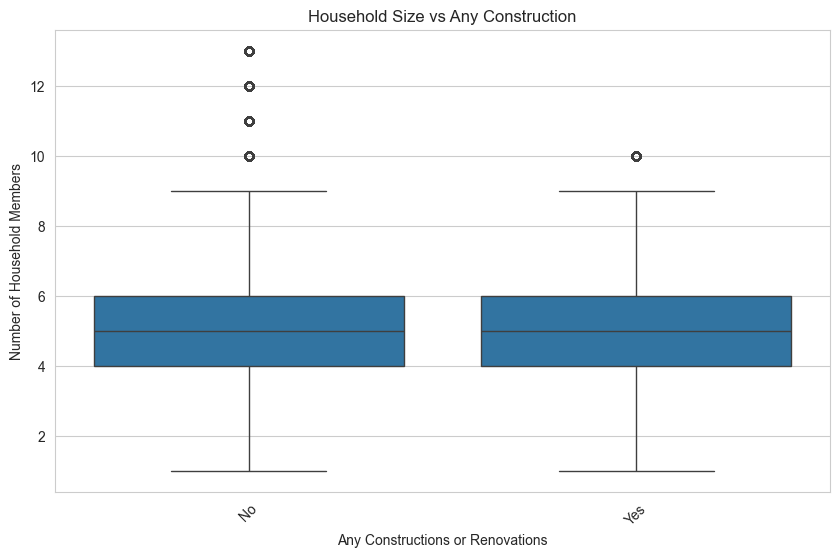

In [41]:
# Plot household size vs any construction
plt.figure(figsize=(10, 6))
sns.boxplot(x='any_constructions_or_renovations_in_the_household', y='no_of_household_members', data=combined_ec1)
plt.title('Household Size vs Any Construction')
plt.xlabel('Any Constructions or Renovations')
plt.ylabel('Number of Household Members')
plt.xticks(rotation=45)
plt.show()

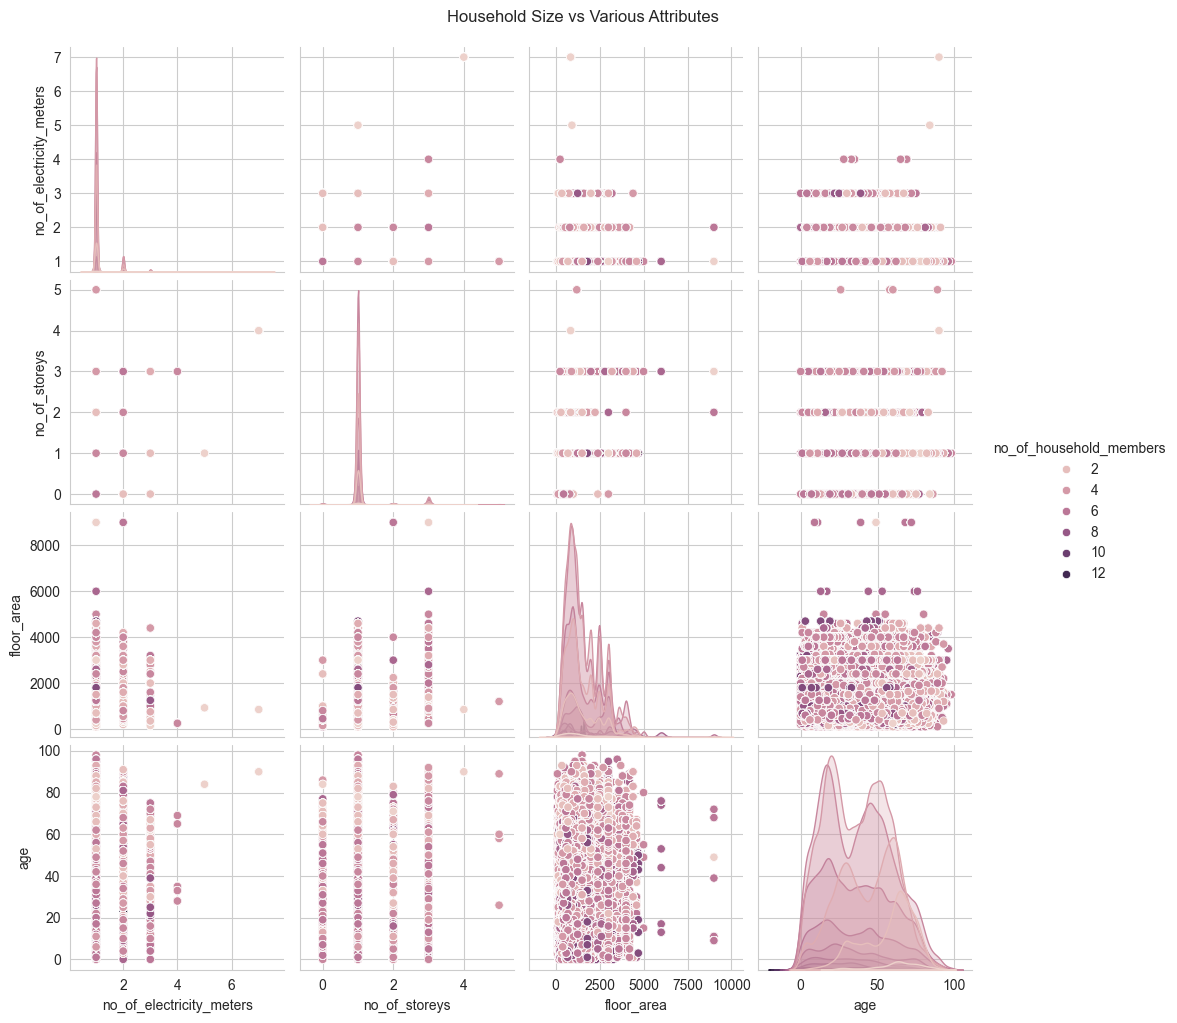

In [42]:
# Select relevant columns for the plot
columns_to_plot = [
    'no_of_household_members', 'any_constructions_or_renovations_in_the_household',
    'no_of_electricity_meters', 'type_of_house', 'no_of_storeys', 'floor_area',
    'household_id', 'member_id', 'age', 'is_there_business_carried_out_in_the_household',
    'main_material_used_for_walls_of_the_house', 'main_material_used_for_roof_of_the_house'
]

# Create a pair plot
sns.pairplot(combined_ec1[columns_to_plot], hue='no_of_household_members')
plt.suptitle('Household Size vs Various Attributes', y=1.02)
plt.show()

In [45]:
# Define the columns for each CSV file
columns_dict = {
    'household_size_vs_any_constructions_or_renovations': ['household_id', 'no_of_household_members', 'any_constructions_or_renovations_in_the_household'],
    'household_size_vs_no_of_electricity_meters': ['household_id', 'no_of_household_members', 'no_of_electricity_meters'],
    'household_size_vs_type_of_house': ['household_id', 'no_of_household_members', 'type_of_house'],
    'household_size_vs_no_of_storeys': ['household_id', 'no_of_household_members', 'no_of_storeys'],
    'household_size_vs_floor_area': ['household_id', 'no_of_household_members', 'floor_area'],
    'household_size_vs_is_there_business_carried_out': ['household_id', 'no_of_household_members', 'is_there_business_carried_out_in_the_household'],
    'household_size_vs_main_material_used_for_walls': ['household_id', 'no_of_household_members', 'main_material_used_for_walls_of_the_house'],
    'household_size_vs_main_material_used_for_roof': ['household_id', 'no_of_household_members', 'main_material_used_for_roof_of_the_house'],
    'household_size_vs_age': ['household_id', 'no_of_household_members', 'age']
}

# Create and save each CSV file
for file_name, columns in columns_dict.items():
    export_df = combined_ec1[columns]
    csv_file_path = f'{file_name}.csv'
    export_df.to_csv(csv_file_path, index=False)
    print(f"CSV file created at: {csv_file_path}")

CSV file created at: household_size_vs_any_constructions_or_renovations.csv
CSV file created at: household_size_vs_no_of_electricity_meters.csv
CSV file created at: household_size_vs_type_of_house.csv
CSV file created at: household_size_vs_no_of_storeys.csv
CSV file created at: household_size_vs_floor_area.csv
CSV file created at: household_size_vs_is_there_business_carried_out.csv
CSV file created at: household_size_vs_main_material_used_for_walls.csv
CSV file created at: household_size_vs_main_material_used_for_roof.csv
CSV file created at: household_size_vs_age.csv


High Household Size: 24218
Low Household Size: 199539
High Household Summary Statistics:
                age  no_of_electricity_meters  no_of_storeys    floor_area  \
count  24218.000000              24218.000000   24218.000000  24218.000000   
mean      40.229127                  1.778099       1.704228   2096.137615   
std       21.620708                  0.632348       0.925797   1389.671445   
min        0.000000                  1.000000       0.000000    100.000000   
25%       21.000000                  1.000000       1.000000   1000.000000   
50%       42.000000                  2.000000       1.000000   1800.000000   
75%       57.000000                  2.000000       3.000000   3000.000000   
max       92.000000                  7.000000       5.000000   9000.000000   

       no_of_household_members  
count             24218.000000  
mean                  4.603353  
std                   1.715844  
min                   1.000000  
25%                   4.000000  
50%       

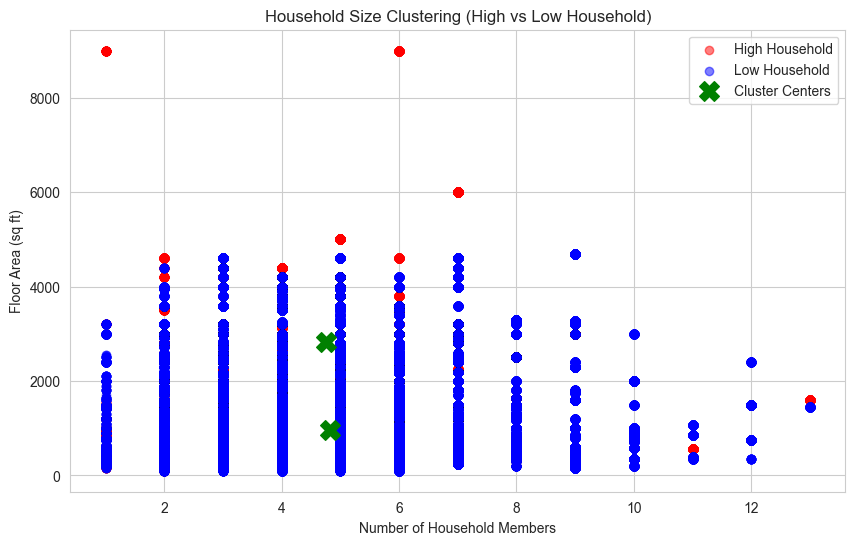

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('household_data.csv')

# Data Cleaning and Preprocessing
# Let's handle missing values (you can choose to drop or fill them as per your data's requirements)
df = df.dropna()  # Dropping rows with missing values

# High household conditions
high_household_conditions = (
    (df['any_constructions_or_renovations_in_the_household'] == 'yes') |
    (df['no_of_electricity_meters'] > 1) |
    (df['type_of_house'] != 'unknown') & 
    (df['no_of_storeys'] > 1) | 
    (df['floor_area'] > 3000) & 
    (df['no_of_household_members'] > 2) &
    (df['is_there_business_carried_out_in_the_household'] == 'yes')
)

# Create high household and low household datasets
high_household = df[high_household_conditions]
low_household = df[~high_household_conditions]  # The rest is considered low household

# Print the high household and low household group sizes
print(f"High Household Size: {len(high_household)}")
print(f"Low Household Size: {len(low_household)}")

# Summary Statistics for High Household
high_household_summary = high_household.describe()
print("High Household Summary Statistics:")
print(high_household_summary)

# Summary Statistics for Low Household
low_household_summary = low_household.describe()
print("Low Household Summary Statistics:")
print(low_household_summary)

# Perform clustering analysis (optional: clustering based on number of household members, floor area)
from sklearn.cluster import KMeans

# Extract features for clustering: "no_of_household_members" and "floor_area"
clustering_features = df[['no_of_household_members', 'floor_area']]

# Perform KMeans clustering into 2 clusters (for high and low households)
kmeans = KMeans(n_clusters=2, random_state=42)
df['household_cluster'] = kmeans.fit_predict(clustering_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plot for high household and low household
plt.scatter(high_household['no_of_household_members'], high_household['floor_area'], color='red', label='High Household', alpha=0.5)
plt.scatter(low_household['no_of_household_members'], low_household['floor_area'], color='blue', label='Low Household', alpha=0.5)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='green', marker='X', s=200, label='Cluster Centers')

plt.xlabel('Number of Household Members')
plt.ylabel('Floor Area (sq ft)')
plt.title('Household Size Clustering (High vs Low Household)')
plt.legend()
plt.show()

# Optionally, export the clustered data to CSV to analyze further
df.to_csv('clustered_households.csv', index=False)


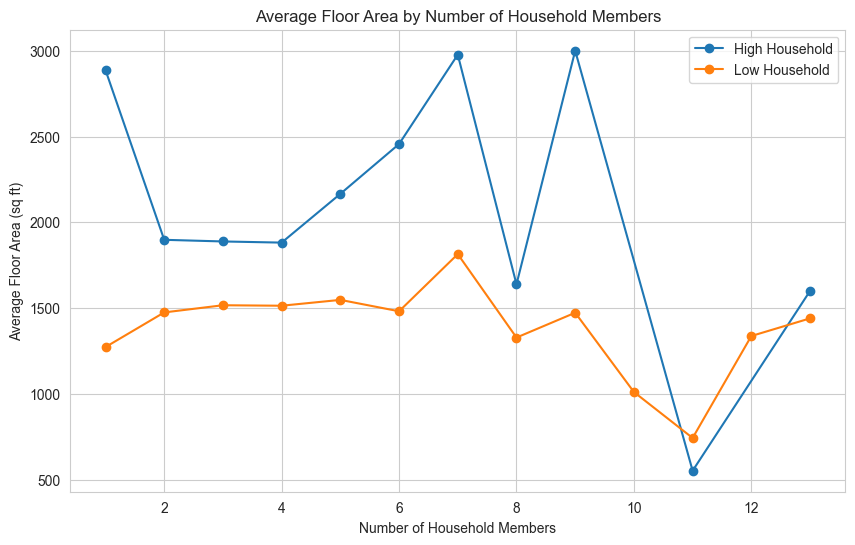

In [52]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('household_data.csv')

# Data Cleaning and Preprocessing
# Let's handle missing values (you can choose to drop or fill them as per your data's requirements)
df = df.dropna()  # Dropping rows with missing values

# High household conditions
high_household_conditions = (
    (df['any_constructions_or_renovations_in_the_household'] == 'yes') |
    (df['no_of_electricity_meters'] > 1) |
    (df['type_of_house'] != 'unknown') & 
    (df['no_of_storeys'] > 1) | 
    (df['floor_area'] > 3000) & 
    (df['no_of_household_members'] > 2) &
    (df['is_there_business_carried_out_in_the_household'] == 'yes')
)

# Create high household and low household datasets
high_household = df[high_household_conditions]
low_household = df[~high_household_conditions]  # The rest is considered low household

# Calculate average floor area for each number of household members
high_avg_floor_area = high_household.groupby('no_of_household_members')['floor_area'].mean()
low_avg_floor_area = low_household.groupby('no_of_household_members')['floor_area'].mean()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(high_avg_floor_area.index, high_avg_floor_area.values, label='High Household', marker='o')
plt.plot(low_avg_floor_area.index, low_avg_floor_area.values, label='Low Household', marker='o')

plt.xlabel('Number of Household Members')
plt.ylabel('Average Floor Area (sq ft)')
plt.title('Average Floor Area by Number of Household Members')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Select relevant columns for the CSV file
columns_to_export = [
    'household_id', 'member_id', 'age', 'any_constructions_or_renovations_in_the_household',
    'no_of_electricity_meters', 'type_of_house', 'no_of_storeys', 'floor_area',
    'no_of_household_members', 'is_there_business_carried_out_in_the_household',
    'main_material_used_for_walls_of_the_house', 'main_material_used_for_roof_of_the_house'
]

# Create a new DataFrame with the selected columns
export_df = combined_ec1[columns_to_export]

# Define the file path for the CSV file
csv_file_path = 'household_data.csv'

# Save the DataFrame to a CSV file
export_df.to_csv(csv_file_path, index=False)

print(f"CSV file created at: {csv_file_path}")

CSV file created at: household_data.csv


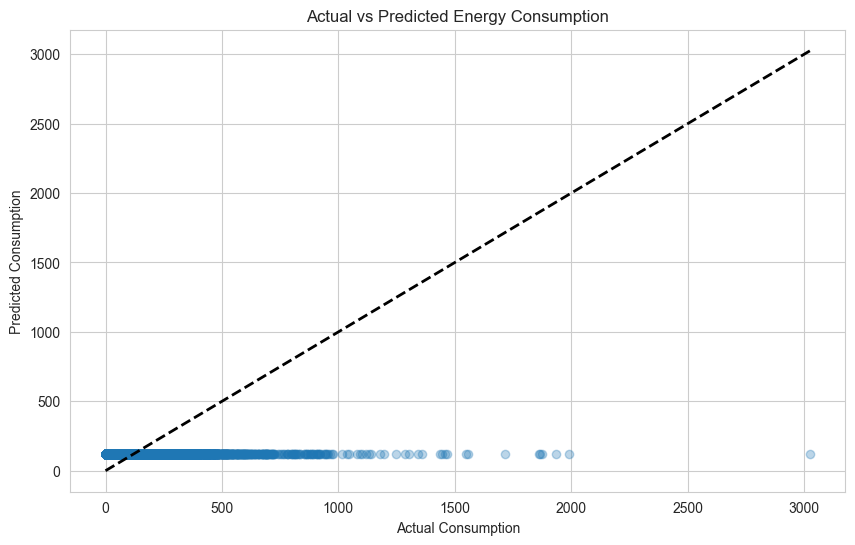

KeyboardInterrupt: 

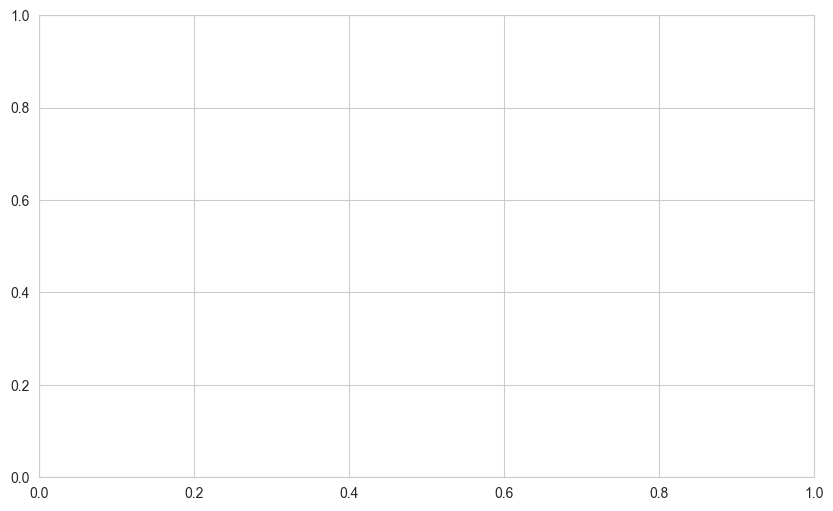

In [40]:
import seaborn as sns

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()